<a href="https://colab.research.google.com/github/anapbatista/Fundamentos-em-Ciencia-de-Dados/blob/main/Trabalho_1_NYC_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalho 1: NYC-Housing-Data-2003-2019

GRUPO:
Ana Paula de Abreu Batista (12688424); Luiz Gabriel Correia dos Santos (15639682); Leonardo Doro Demore (15674786); Arthur Henrique Silva de Araujo (14651458).

In [ ]:
#IMPORTANDO BIBLIOTECAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done


In [ ]:
import openml

In [ ]:
dataset_id = 43633
dataset = openml.datasets.get_dataset(dataset_id)

<ipython-input-5-24a94bb8c0a9>:2: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = openml.datasets.get_dataset(dataset_id)


In [ ]:
# df - data frame com as instâncias
# y - array com a variável alvo / target
df, y, _, _ = dataset.get_data(dataset_format="dataframe",target=dataset.default_target_attribute)

Parte 1: Estatísticas Descritivas

In [ ]:
# Visualizando os primeiros registros para entender os dados
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,ADDRESS,ZIP_CODE,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,SALE_DATE
0,1,ALPHABET CITY,02 TWO FAMILY HOMES,746 EAST 6 STREET,10009.0,2134.0,3542.0,1899.0,1800000,2003-01-22 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,316 EAST 3 STREET,10009.0,5746.0,2700.0,1900.0,0,2003-12-18 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,316 EAST 3 STREET,10009.0,5746.0,2700.0,1900.0,0,2003-12-18 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,125 AVENUE D,10009.0,2185.0,5725.0,1910.0,426000,2003-10-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,610 EAST 9 STREET,10009.0,2543.0,11568.0,1910.0,0,2003-02-28 00:00:00


In [ ]:
# Checando os tipos de dados e contagem de valores não-nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600202 entries, 0 to 1600201
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   BOROUGH                  1600202 non-null  uint8  
 1   NEIGHBORHOOD             1600202 non-null  object 
 2   BUILDING_CLASS_CATEGORY  1600202 non-null  object 
 3   ADDRESS                  1600202 non-null  object 
 4   ZIP_CODE                 1600186 non-null  float64
 5   LAND_SQUARE_FEET         1582975 non-null  float64
 6   GROSS_SQUARE_FEET        1582976 non-null  float64
 7   YEAR_BUILT               1594175 non-null  float64
 8   SALE_PRICE               1600202 non-null  int64  
 9   SALE_DATE                1600202 non-null  object 
dtypes: float64(4), int64(1), object(4), uint8(1)
memory usage: 111.4+ MB
None


In [ ]:
# Verificar os tipos de dados de cada coluna
print("Tipos de dados iniciais:\n", df.dtypes)

Tipos de dados iniciais:
 BOROUGH                      uint8
NEIGHBORHOOD                object
BUILDING_CLASS_CATEGORY     object
ADDRESS                     object
ZIP_CODE                   float64
LAND_SQUARE_FEET           float64
GROSS_SQUARE_FEET          float64
YEAR_BUILT                 float64
SALE_PRICE                   int64
SALE_DATE                   object
dtype: object


In [ ]:
#dropando o zip code
#entendemos que é melhor dropar o zip code, uma vez que não é necessário para a análise, visto que há inconsistências e se trata de algo individual para cada endereço, não alterando o dataset
df.drop(columns=['ZIP_CODE'], inplace=True)

In [ ]:
df.info()
#dropado com sucesso

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600202 entries, 0 to 1600201
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   BOROUGH                  1600202 non-null  uint8  
 1   NEIGHBORHOOD             1600202 non-null  object 
 2   BUILDING_CLASS_CATEGORY  1600202 non-null  object 
 3   ADDRESS                  1600202 non-null  object 
 4   LAND_SQUARE_FEET         1582975 non-null  float64
 5   GROSS_SQUARE_FEET        1582976 non-null  float64
 6   YEAR_BUILT               1594175 non-null  float64
 7   SALE_PRICE               1600202 non-null  int64  
 8   SALE_DATE                1600202 non-null  object 
dtypes: float64(3), int64(1), object(4), uint8(1)
memory usage: 99.2+ MB


In [ ]:
# Estatísticas descritivas para colunas numéricas
print(df.describe())

            BOROUGH  LAND_SQUARE_FEET  GROSS_SQUARE_FEET    YEAR_BUILT  \
count  1.600202e+06      1.582975e+06       1.582976e+06  1.594175e+06   
mean   2.916479e+00      3.966939e+03       4.362071e+03  1.728228e+03   
std    1.310163e+00      4.228553e+05       4.870667e+04  6.174767e+02   
min    1.000000e+00      0.000000e+00       0.000000e+00  0.000000e+00   
25%    2.000000e+00      0.000000e+00       0.000000e+00  1.917000e+03   
50%    3.000000e+00      1.845000e+03       1.248000e+03  1.931000e+03   
75%    4.000000e+00      2.800000e+03       2.351000e+03  1.964000e+03   
max    5.000000e+00      2.147557e+08       1.496215e+07  2.020000e+03   

         SALE_PRICE  
count  1.600202e+06  
mean   8.545699e+05  
std    1.163342e+07  
min    0.000000e+00  
25%    0.000000e+00  
50%    3.049380e+05  
75%    6.211320e+05  
max    4.111112e+09  


In [ ]:
#Percebe-se que há dados zerados nas colunas "LAND_SQUARE_FEET", " GROSS_SQUARE_FEET", "SALE_PRICE" e "YEAR_BUILT", o que não faz sentido, então trataremos disso mais tarde.

**PARTE 2**: Tratamento de dados nulos


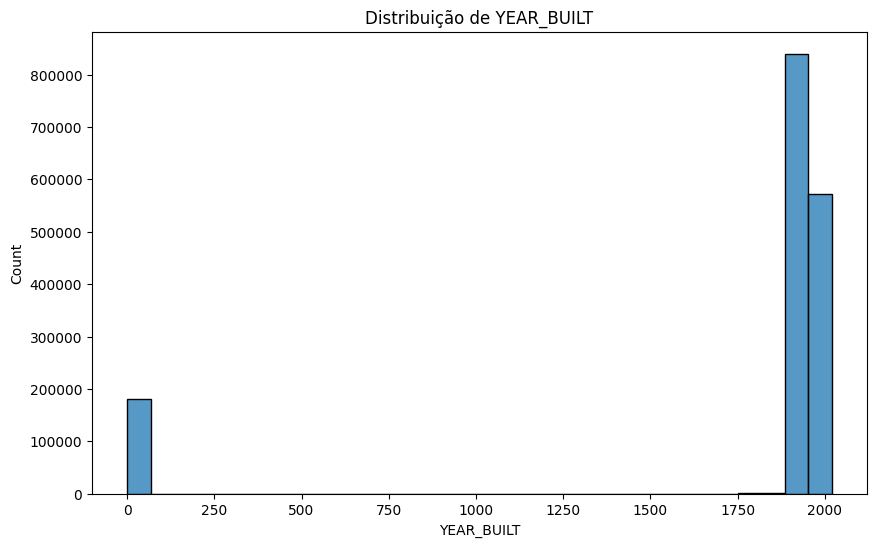

In [ ]:
# Histograma para 'YEAR_BUILT' para verificar se é cabível a utilização da média para preencher valores nulos
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['YEAR_BUILT'].dropna(), kde=False, bins=30)
plt.title('Distribuição de YEAR_BUILT')
plt.show()

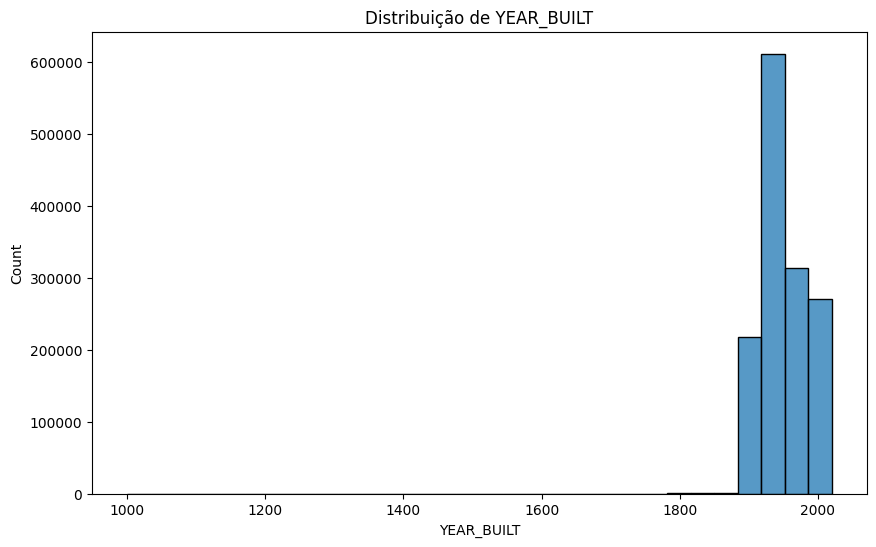

In [ ]:
#Pelo gráfico anterior, percebe-se que há construções no ano 0 (algo que não faz sentido), portanto, estamos transformando estes valores em nulos para imputar a média posteriormente
df['YEAR_BUILT'] = df['YEAR_BUILT'].replace(0, np.nan)
plt.figure(figsize=(10, 6))
sns.histplot(df['YEAR_BUILT'].dropna(), kde=False, bins=30)
plt.title('Distribuição de YEAR_BUILT')
plt.show()

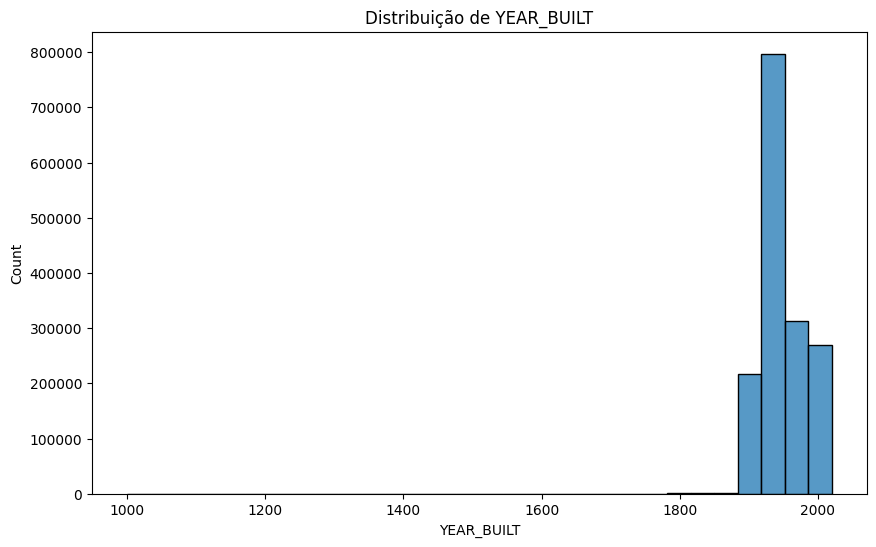

In [ ]:
#imputando YEAR BUILT com a média
#A estratégia escolhida foi a média pois percebe-se, pelo gráfico, que a grande maioria do "ano de construção" é próxima dos anos 1900 à 2000
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy = 'mean')
df['YEAR_BUILT'] = imp_mean.fit_transform(df['YEAR_BUILT'].values.reshape(-1, 1))
plt.figure(figsize=(10, 6))
sns.histplot(df['YEAR_BUILT'].dropna(), kde=False, bins=30)
plt.title('Distribuição de YEAR_BUILT')
plt.show()

In [ ]:
# Correção de tipo de dados: transformando de a coluna "YEAR_BUILT" de float para int

df['YEAR_BUILT'] = df['YEAR_BUILT'].astype(int)
print("\nTipos de dados após correção de YEAR_BUILT:\n", df.dtypes)


Tipos de dados após correção de YEAR_BUILT:
 BOROUGH                      uint8
NEIGHBORHOOD                object
BUILDING_CLASS_CATEGORY     object
ADDRESS                     object
LAND_SQUARE_FEET           float64
GROSS_SQUARE_FEET          float64
YEAR_BUILT                   int64
SALE_PRICE                   int64
SALE_DATE                   object
dtype: object


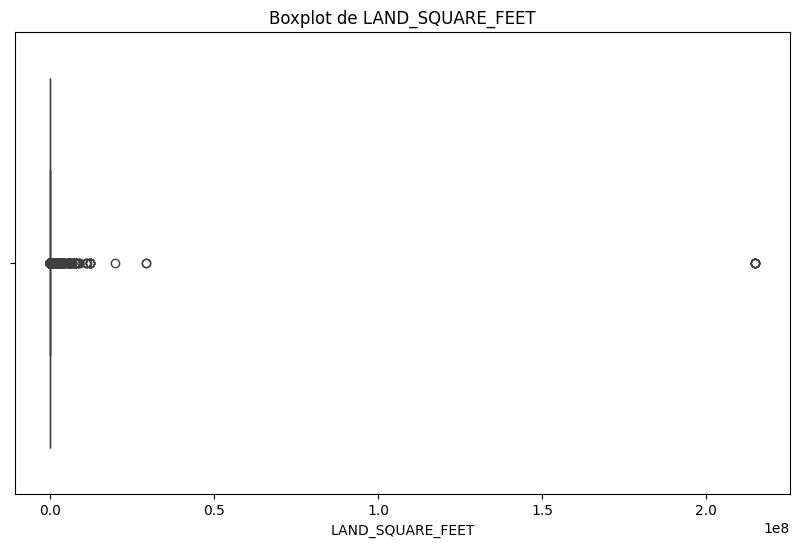

In [ ]:
# Boxplot para 'LAND_SQUARE_FEET' para confirmar se os valores zerados descritos anteriormente nas estatísticas descritivas realmente acontecem
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['LAND_SQUARE_FEET'])
plt.title('Boxplot de LAND_SQUARE_FEET')
plt.show()

In [ ]:
#Pelo gráfico confirma-se esses valores zerados, portanto, pelo fato desse dataset ser muito grande, é possível realizar a remoção das linhas que tiverem valor zerado na coluna "LAND_SQUARE_FEET"
df = df.drop(df[df["LAND_SQUARE_FEET"]==0].index)
print(df.describe())
print(df.info())
#imputando os valores nulos de LAND_SQUARE_FEET com a média
#A estratégia escolhida foi a média pois percebe-se que há poucos dados nulos, logo não irá tendenciar muito o gráfico.
imp_mean = SimpleImputer(missing_values=np.nan, strategy = 'mean')
df['LAND_SQUARE_FEET'] = imp_mean.fit_transform(df['LAND_SQUARE_FEET'].values.reshape(-1, 1))
print(df.info())

             BOROUGH  LAND_SQUARE_FEET  GROSS_SQUARE_FEET     YEAR_BUILT  \
count  958128.000000      9.409010e+05       9.409020e+05  958128.000000   
mean        3.399113      6.673991e+03       7.306733e+03    1942.353575   
std         1.063082      5.484586e+05       6.296976e+04      31.487877   
min         1.000000      1.000000e+00       0.000000e+00    1000.000000   
25%         3.000000      2.000000e+03       1.452000e+03    1920.000000   
50%         4.000000      2.500000e+03       2.100000e+03    1931.000000   
75%         4.000000      4.000000e+03       3.140000e+03    1960.000000   
max         5.000000      2.147557e+08       1.496215e+07    2019.000000   

         SALE_PRICE  
count  9.581280e+05  
mean   8.601708e+05  
std    1.356232e+07  
min    0.000000e+00  
25%    0.000000e+00  
50%    2.907000e+05  
75%    5.700000e+05  
max    4.111112e+09  
<class 'pandas.core.frame.DataFrame'>
Index: 958128 entries, 0 to 1600201
Data columns (total 9 columns):
 #   Column

In [ ]:
#Percebe-se que não há mais valores zerados, nem dados nulos
#Portanto, resta fazer o mesmo com as colunas "GROSS_SQUARE_FEET" e "SALE PRICE"

In [ ]:
df = df.drop(df[df["GROSS_SQUARE_FEET"]==0].index)
#imputando GROSS_SQUARE_FEET com a média
#A estratégia escolhida foi a média pois percebe-se que há poucos dados nulos.
imp_mean = SimpleImputer(missing_values=np.nan, strategy = 'mean')
df['GROSS_SQUARE_FEET'] = imp_mean.fit_transform(df['GROSS_SQUARE_FEET'].values.reshape(-1, 1))
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 917231 entries, 0 to 1600197
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   BOROUGH                  917231 non-null  uint8  
 1   NEIGHBORHOOD             917231 non-null  object 
 2   BUILDING_CLASS_CATEGORY  917231 non-null  object 
 3   ADDRESS                  917231 non-null  object 
 4   LAND_SQUARE_FEET         917231 non-null  float64
 5   GROSS_SQUARE_FEET        917231 non-null  float64
 6   YEAR_BUILT               917231 non-null  int64  
 7   SALE_PRICE               917231 non-null  int64  
 8   SALE_DATE                917231 non-null  object 
dtypes: float64(2), int64(2), object(4), uint8(1)
memory usage: 63.9+ MB


,BOROUGH,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
count,917231.000000,9.172310e+05,9.172310e+05,917231.000000,9.172310e+05
mean,3.400435,6.444862e+03,7.638758e+03,1942.142600,8.527808e+05
std,1.060404,5.548801e+05,6.375760e+04,31.881253,1.370653e+07
min,1.000000,1.000000e+00,1.000000e+00,1018.000000,0.000000e+00
25%,3.000000,2.000000e+03,1.550000e+03,1920.000000,0.000000e+00
50%,4.000000,2.500000e+03,2.192000e+03,1931.000000,3.050000e+05
75%,4.000000,4.000000e+03,3.280000e+03,1960.000000,5.750000e+05
max,5.000000,2.147557e+08,1.496215e+07,2019.000000,4.111112e+09


In [ ]:
df = df.drop(df[df["SALE_PRICE"]==0].index)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 579037 entries, 0 to 1600197
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   BOROUGH                  579037 non-null  uint8  
 1   NEIGHBORHOOD             579037 non-null  object 
 2   BUILDING_CLASS_CATEGORY  579037 non-null  object 
 3   ADDRESS                  579037 non-null  object 
 4   LAND_SQUARE_FEET         579037 non-null  float64
 5   GROSS_SQUARE_FEET        579037 non-null  float64
 6   YEAR_BUILT               579037 non-null  int64  
 7   SALE_PRICE               579037 non-null  int64  
 8   SALE_DATE                579037 non-null  object 
dtypes: float64(2), int64(2), object(4), uint8(1)
memory usage: 40.3+ MB


,BOROUGH,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
count,579037.000000,5.790370e+05,5.790370e+05,579037.000000,5.790370e+05
mean,3.419044,6.357345e+03,7.488086e+03,1943.067664,1.350858e+06
std,1.079279,5.684982e+05,5.794867e+04,32.668915,1.723147e+07
min,1.000000,1.000000e+00,1.000000e+00,1050.000000,1.000000e+00
25%,3.000000,2.000000e+03,1.500000e+03,1920.000000,3.385000e+05
50%,4.000000,2.500000e+03,2.103000e+03,1931.000000,4.960000e+05
75%,4.000000,4.000000e+03,3.192000e+03,1960.000000,7.350000e+05
max,5.000000,2.147557e+08,1.496215e+07,2019.000000,4.111112e+09


**PARTE 3**: Removendo Outliers

In [ ]:
from sklearn.neighbors import LocalOutlierFactor


In [ ]:
#criando um dataset2, o qual contém apenas os valores numéricos do dataset1
numeric_types=['int', 'float']
df2 = df.select_dtypes(numeric_types)
df2 = df2[df.isnull().sum(axis=1)==0]
df2

,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
0,2134.0,3542.0,1899,1800000
3,2185.0,5725.0,1910,426000
8,1909.0,7437.0,1920,3
9,1920.0,7485.0,1920,3
10,1916.0,7485.0,1920,3
...,...,...,...,...
1600191,2255.0,2377.0,1998,640000
1600192,4000.0,2400.0,2000,917000
1600194,2340.0,2160.0,2001,610000
1600195,2730.0,2565.0,2001,625000


In [ ]:
#Aplicando a biblioteca para remover os outliers
lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(df2)

In [ ]:
#Colocando os valores do df2, que estão com os outiliers removidos, para o df
df = df.drop(df2[y_pred == -1].index.values, axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531919 entries, 0 to 1600197
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   BOROUGH                  531919 non-null  uint8  
 1   NEIGHBORHOOD             531919 non-null  object 
 2   BUILDING_CLASS_CATEGORY  531919 non-null  object 
 3   ADDRESS                  531919 non-null  object 
 4   LAND_SQUARE_FEET         531919 non-null  float64
 5   GROSS_SQUARE_FEET        531919 non-null  float64
 6   YEAR_BUILT               531919 non-null  int64  
 7   SALE_PRICE               531919 non-null  int64  
 8   SALE_DATE                531919 non-null  object 
dtypes: float64(2), int64(2), object(4), uint8(1)
memory usage: 37.0+ MB


**PARTE 4**: Normalização

In [ ]:
from scipy.stats import zscore
#Fazendo um cópia de df e selecionando apenas os valores numéricos
df2 = df.copy()
numeric_cols = df2.select_dtypes(include=[np.number]).columns
df2[numeric_cols] = df2[numeric_cols].apply(zscore)
print(df2.describe())

            BOROUGH  LAND_SQUARE_FEET  GROSS_SQUARE_FEET    YEAR_BUILT  \
count  5.319190e+05      5.319190e+05       5.319190e+05  5.319190e+05   
mean  -1.709837e-18     -6.451962e-18      -1.282378e-18 -1.589293e-15   
std    1.000001e+00      1.000001e+00       1.000001e+00  1.000001e+00   
min   -2.293332e+00     -9.660310e-02      -1.983304e-01 -4.419916e+00   
25%   -4.115039e-01     -5.115621e-02      -1.539026e-01 -7.011030e-01   
50%    5.294102e-01     -3.978880e-02      -1.366580e-01 -3.602118e-01   
75%    5.294102e-01     -5.686579e-03      -1.071380e-01  5.385013e-01   
max    1.470324e+00      1.757956e+02       1.107401e+02  2.366918e+00   

         SALE_PRICE  
count  5.319190e+05  
mean   5.663835e-18  
std    1.000001e+00  
min   -9.073452e-02  
25%   -6.723904e-02  
50%   -5.643427e-02  
75%   -4.033412e-02  
max    1.352135e+02  


In [ ]:
#Aplicando os dados normalizados em df
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df2[numeric_cols]
print(df.describe())

            BOROUGH  LAND_SQUARE_FEET  GROSS_SQUARE_FEET    YEAR_BUILT  \
count  5.319190e+05      5.319190e+05       5.319190e+05  5.319190e+05   
mean  -1.709837e-18     -6.451962e-18      -1.282378e-18 -1.589293e-15   
std    1.000001e+00      1.000001e+00       1.000001e+00  1.000001e+00   
min   -2.293332e+00     -9.660310e-02      -1.983304e-01 -4.419916e+00   
25%   -4.115039e-01     -5.115621e-02      -1.539026e-01 -7.011030e-01   
50%    5.294102e-01     -3.978880e-02      -1.366580e-01 -3.602118e-01   
75%    5.294102e-01     -5.686579e-03      -1.071380e-01  5.385013e-01   
max    1.470324e+00      1.757956e+02       1.107401e+02  2.366918e+00   

         SALE_PRICE  
count  5.319190e+05  
mean   5.663835e-18  
std    1.000001e+00  
min   -9.073452e-02  
25%   -6.723904e-02  
50%   -5.643427e-02  
75%   -4.033412e-02  
max    1.352135e+02  


**PARTE 5**: Gráficos para entender o dataset pós o processo de tratamento e checar a normalização

In [ ]:
#Agrupando dataset por vizinhança
dataset_agrupado = df.groupby('NEIGHBORHOOD')['SALE_PRICE'].mean()

In [ ]:
#Ordenando do maior para o menor valor
dataset_agrupado = dataset_agrupado.sort_values(ascending=False)

In [ ]:
dataset_agrupado.head(5)

NEIGHBORHOOD
MIDTOWN CBD                  10.402428
FINANCIAL                     6.087277
FINANCIAL                     5.902334
MIDTOWN CBD                   5.171190
KIPS BAY                      3.954561
Name: SALE_PRICE, dtype: float64

In [ ]:
#Percebe-se que há nomes de vizinhanças repetidos, portanto deve haver espaços em branco em algumas vizinhanças
#Vamos confirmar usando:
dataset_agrupado.index

Index(['MIDTOWN CBD              ', 'FINANCIAL                ', 'FINANCIAL',
       'MIDTOWN CBD', 'KIPS BAY                 ', 'TRIBECA                  ',
       'FASHION                  ', 'FASHION', 'FLATIRON                 ',
       'MIDTOWN WEST',
       ...
       'PORT RICHMOND            ', 'MARINERS HARBOR          ',
       'STAPLETON                ', 'BROAD CHANNEL            ',
       'PORT IVORY               ', 'CONCORD                  ',
       'VAN CORTLANDT PARK', 'PELHAM BAY               ',
       'UPPER BAY                ', 'AIRPORT JFK              '],
      dtype='object', name='NEIGHBORHOOD', length=506)

In [ ]:
#Confirmado que há espaços em branco, portanto vamos apagá-los do dataset original e em seguida reagrupar
df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].str.strip().str.upper()
dataset_agrupado = df.groupby('NEIGHBORHOOD')['SALE_PRICE'].mean()
dataset_agrupado = dataset_agrupado.sort_values(ascending=False)
dataset_agrupado.index

Index(['MIDTOWN CBD', 'FINANCIAL', 'FASHION', 'TRIBECA', 'KIPS BAY',
       'FLATIRON', 'JAVITS CENTER', 'CHELSEA', 'SOHO', 'CIVIC CENTER',
       ...
       'JAMAICA BAY', 'PORT RICHMOND', 'STAPLETON', 'MARINERS HARBOR',
       'PORT IVORY', 'BROAD CHANNEL', 'CONCORD', 'PELHAM BAY', 'UPPER BAY',
       'AIRPORT JFK'],
      dtype='object', name='NEIGHBORHOOD', length=260)

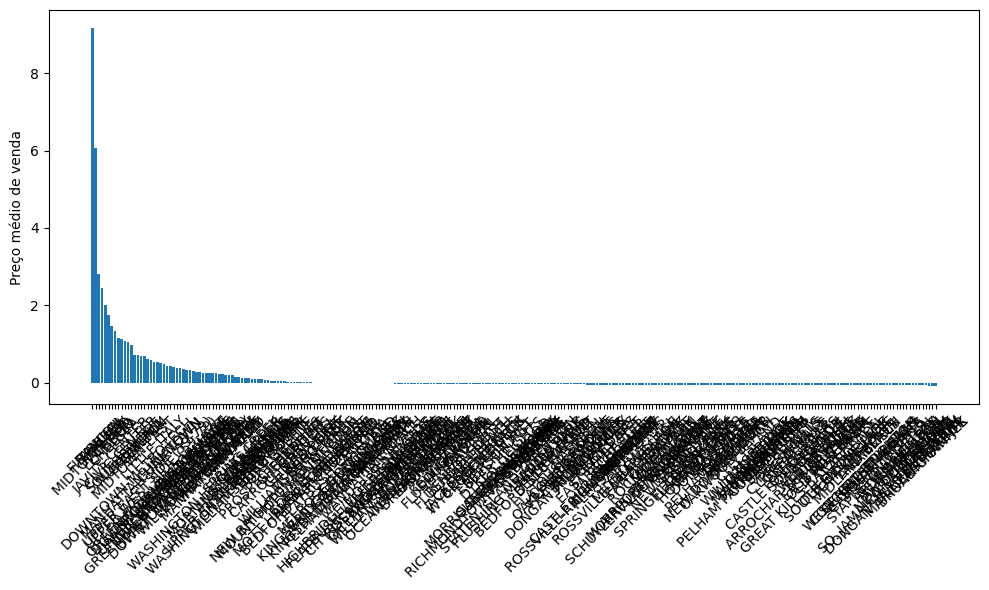

In [ ]:
#Criando o gráfico
fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylabel('Preço médio de venda')
ax.bar(dataset_agrupado.index, dataset_agrupado.values)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Pelo gráfico anterior percebe-se que pelo fato de existirem muitas vizinhanças, o gráfico se torna ilegível. Portanto, vamos criar um gráfico apenas com as 10 mais caras

In [ ]:
dataset_top10 = dataset_agrupado.head(10)
dataset_top10

NEIGHBORHOOD
MIDTOWN CBD      9.170607
FINANCIAL        6.057448
FASHION          2.800393
TRIBECA          2.453358
KIPS BAY         2.015498
FLATIRON         1.753413
JAVITS CENTER    1.471311
CHELSEA          1.343580
SOHO             1.164624
CIVIC CENTER     1.134965
Name: SALE_PRICE, dtype: float64

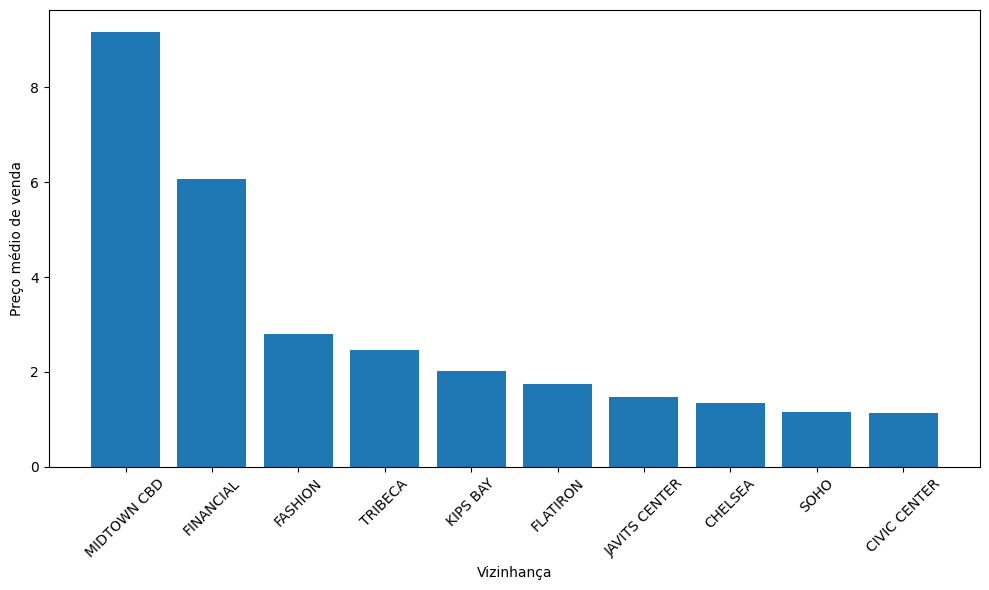

In [ ]:
#Criando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('Vizinhança')
ax.set_ylabel('Preço médio de venda')
ax.bar(dataset_top10.index, dataset_top10.values)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Agrupando dataset por tipo de casa
df['BUILDING_CLASS_CATEGORY'] = df['BUILDING_CLASS_CATEGORY'].str.strip().str.upper()
dataset_agrupado = df.groupby('BUILDING_CLASS_CATEGORY')['SALE_PRICE'].mean()
dataset_agrupado = dataset_agrupado.sort_values(ascending=False)
dataset_top10 = dataset_agrupado.head(10)
dataset_top10.index

Index(['25 LUXURY HOTELS', '45 CONDO HOTELS', '34 THEATRES',
       '21  OFFICE BUILDINGS', '21 OFFICE BUILDINGS', '26 OTHER HOTELS',
       '08 RENTALS - ELEVATOR APARTMENTS', '31 COMMERCIAL VACANT LAND',
       '11A CONDO-RENTALS', '23 LOFT BUILDINGS'],
      dtype='object', name='BUILDING_CLASS_CATEGORY')

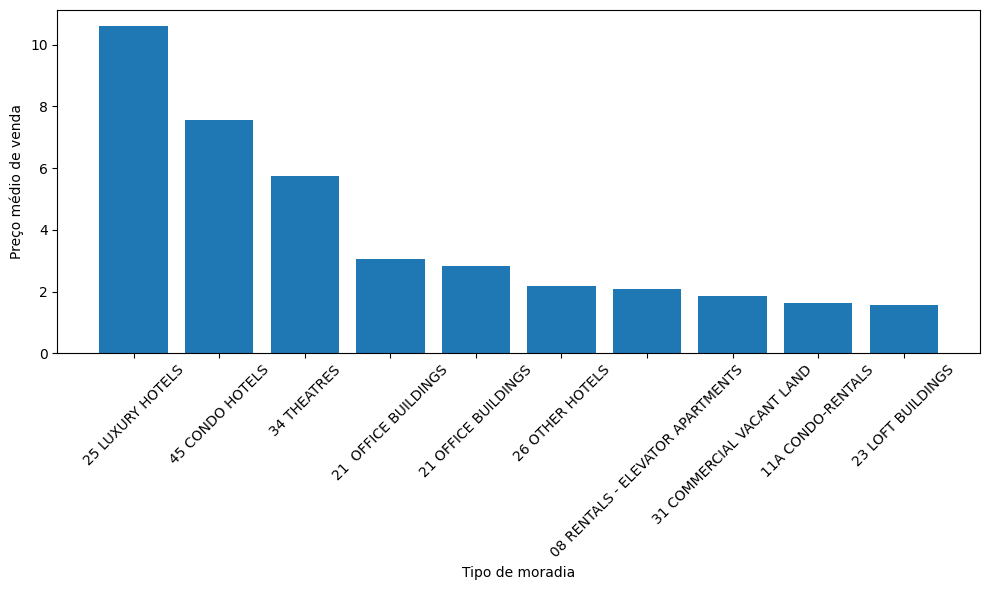

In [ ]:
#Criando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('Tipo de moradia')
ax.set_ylabel('Preço médio de venda')
ax.bar(dataset_top10.index, dataset_top10.values)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Trabalho 2 - AM Supervisionado e Não Supervisionado

In [ ]:
#AM Supervisionado

In [ ]:
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 531919 entries, 0 to 1600197
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   BOROUGH                  531919 non-null  float64
 1   NEIGHBORHOOD             531919 non-null  object 
 2   BUILDING_CLASS_CATEGORY  531919 non-null  object 
 3   ADDRESS                  531919 non-null  object 
 4   LAND_SQUARE_FEET         531919 non-null  float64
 5   GROSS_SQUARE_FEET        531919 non-null  float64
 6   YEAR_BUILT               531919 non-null  float64
 7   SALE_PRICE               531919 non-null  float64
 8   SALE_DATE                531919 non-null  object 
dtypes: float64(5), object(4)
memory usage: 40.6+ MB
None
      BOROUGH   NEIGHBORHOOD            BUILDING_CLASS_CATEGORY  \
0   -2.293332  ALPHABET CITY               02  TWO FAMILY HOMES   
8   -2.293332  ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
9   -2.293332  ALPHABET CITY  

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Criando uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Aplicando o LabelEncoder em todas as colunas do DataFrame(transformando strings para valores numéricos)
df_num = df.apply(label_encoder.fit_transform)

In [ ]:
# Identificar o atributo-alvo (preço da casa) e as características (outras variáveis que podem influenciar o preço)
X = df_num.drop(columns=['SALE_PRICE'])  # Características (todas as colunas, exceto 'preco')
y = df_num['SALE_PRICE']  # Atributo-alvo

# Verificar o tipo de tarefa (regressão)
tipo_tarefa = 'regressao'

print(X.shape)
print(y.shape)
print(df_num.head())

(531919, 8)
(531919,)
    BOROUGH  NEIGHBORHOOD  BUILDING_CLASS_CATEGORY  ADDRESS  LAND_SQUARE_FEET  \
0         0             2                        4   367924              1553   
8         0             2                       14   121543              1328   
9         0             2                       14   121543              1339   
10        0             2                       14   121543              1335   
11        0             2                       14    80116              1796   

    GROSS_SQUARE_FEET  YEAR_BUILT  SALE_PRICE  SALE_DATE  
0                3177          69       30181         21  
8                6430          90           2        164  
9                6459          90           2        164  
10               6459          90           2        164  
11               7102          70       29766        247  


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Escolhendo o número de splits (partições) e semente do random_state
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Lista de valores de K que você deseja testar
k_values = list(range(1, 21))  # Por exemplo, testar de 1 a 20 vizinhos

# Inicializando a lista para armazenar os scores de MSE e R² para cada valor de K
mse_scores = []
r2_scores = []

# Utilizando um loop para selecionar os conjuntos de treino e teste
for k in k_values:
    # Inicializa o modelo KNN com o valor atual de K
    knn_regressor = KNeighborsRegressor(n_neighbors=k)

    # Inicializando as listas para armazenar os scores de MSE e R² para este valor de K
    fold_mse_scores = []
    fold_r2_scores = []

    # Utilizando validação cruzada
    for train_index, test_index in folds.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]

        # Treinando o modelo
        knn_regressor.fit(X_train, y_train)

        # Fazendo previsões
        y_pred = knn_regressor.predict(X_val)

        # Calculando MSE e R²
        mse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)

        # Armazenando os scores para este fold
        fold_mse_scores.append(mse)
        fold_r2_scores.append(r2)

    # Calculando a média dos scores de MSE e R² para este valor de K
    mean_mse = np.mean(fold_mse_scores)
    mean_r2 = np.mean(fold_r2_scores)

    # Armazenando os scores médios para este valor de K
    mse_scores.append(mean_mse)
    r2_scores.append(mean_r2)

    print(f"Valor de K = {k}")
    print("Média do Erro Quadrático Médio (MSE):", mean_mse)
    print("Média do Coeficiente de Determinação (R²):", mean_r2)
    print()

# Encontrando o melhor valor de K com base no menor MSE ou no maior R²
best_k_mse = k_values[np.argmin(mse_scores)]
best_k_r2 = k_values[np.argmax(r2_scores)]

print("Melhor valor de K baseado no menor MSE:", best_k_mse)
print("Melhor valor de K baseado no maior R²:", best_k_r2)


